In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
sns.set(style="white", context='poster')
from sympy import *
import math
init_printing(use_unicode=True)
from scipy.integrate import solve_ivp

In [2]:
%load_ext autoreload
%autoreload 2


In [3]:
#from model_equations_separate_NC import *
from model_equations_separate_NC_sep_vmax import *


In [4]:

HCOLOR = '#ffc58f'
HCOLOR_light = '#ffd2a9'
PCOLOR = '#99cc99'
PCOLOR_light = '#aad5aa'

DONCOLOR = '#7285b7'
RDONCOLOR = 'black' #'#00334D'
DINCOLOR = '#bbdaff' #'#000066'

DOCCOLOR = '#cc6666'
RDOCCOLOR = 'black' #'#00334D'
DICCOLOR = '#ff9da4' #'#000066'

SHCOLOR = '#ffa98f'
SPCOLOR = '#326232'


ccnpalette = [PCOLOR, HCOLOR, SPCOLOR, SHCOLOR,DONCOLOR, RDONCOLOR, DINCOLOR]
ccnorder = ['Bp', 'Bh', 'Sp', 'Sh', 'DON', 'RDON', 'DIN', ]
cccpalette = [PCOLOR, HCOLOR, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
cccorder = ['Bp[C]', 'Bh[C]', 'Sp[C]', 'Sh[C]', 'DOC', 'RDOC', 'DIC']
ccxpalette = [PCOLOR, HCOLOR]
ccxorder = ['Xp', 'Xh']
hnpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
hnorder = [ 'Bh', 'Sp', 'Sh', 'DON', 'RDON', 'DIN']
hcpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
hcorder = [ 'Bh[C]', 'Sp[C]', 'Sh[C]', 'DOC', 'RDOC', 'DIC']
pnpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
pnorder = [ 'Bp', 'Sp', 'Sh', 'DON', 'RDON', 'DIN']
pcpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
pcorder = [ 'Bp[C]', 'Sp[C]', 'Sh[C]', 'DOC', 'RDOC', 'DIC']
sns.color_palette(ccnpalette + cccpalette, )
# 


/fast_data/Osnat/tools/anaconda3/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/fast_data/Osnat/tools/anaconda3/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/fast_data/Osnat/tools/anaconda3/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/fast_data/Osnat/tools/anaconda3/lib/python3.9/site-packages/IPyt

In [5]:

 
sns.color_palette([PCOLOR, HCOLOR, PCOLOR_light, HCOLOR_light] )


In [3]:
refdf = pd.read_csv('prelim_bottle.csv')


In [4]:
refdf.columns

Index(['Unnamed: 0', 'day', '1A3', 'cc 1A3', 'cc mit9312', 'mit9312',
       'cc Bh[N]', 'Bh[N]', 'cc Bp[N]', 'Bp[N]', 'cc Bh[C]', 'Bh[C]',
       'cc Bp[C]', 'Bp[C]', 't'],
      dtype='object')

In [7]:
print_params()

M_h  = 1.16e-06, 1.00e-01
M_p  = 1.16e-06, 1.00e-01
gamma^D_p  = 8.00e-01, 6.91e+04
gamma^D_h  = 8.00e-01, 6.91e+04
R_p  = 6.62e+00, 5.72e+05
R_h  = 6.62e+00, 5.72e+05
E^O_p  = 1.16e-06, 1.00e-01
E^I_p  = 0.00e+00, 0.00e+00
E^O_h  = 0.00e+00, 0.00e+00
E^I_h  = 1.16e-06, 1.00e-01
K^ON_p  = 1.43e-01, 1.23e+04
K^IN_p  = 7.14e-01, 6.17e+04
K^OC_p  = 1.43e-01, 1.23e+04
K^IC_p  = 1.43e-01, 1.23e+04
K^ON_h  = 2.50e-01, 2.16e+04
K^IN_h  = 2.50e-01, 2.16e+04
K^OC_h  = 1.25e+00, 1.08e+05
K^IC_h  = 2.50e-01, 2.16e+04
Vmax^ON_p  = 1.40e-09, 1.21e-04
Vmax^IN_p  = 1.00e-05, 8.64e-01
Vmax^OC_p  = 9.27e-09, 8.01e-04
Vmax^IC_p  = 9.27e-05, 8.01e+00
Vmax^ON_h  = 5.00e-06, 4.32e-01
Vmax^IN_h  = 1.00e-05, 8.64e-01
Vmax^OC_h  = 3.31e-05, 2.86e+00
Vmax^IC_h  = 3.31e-09, 2.86e-04
O_p  = 6.00e-01, 5.18e+04
O_h  = 6.00e-01, 5.18e+04
epsilon  = 1.05e-06, 9.09e-02
VTmax  = 2.50e-06, 2.16e-01
KT_h  = 2.50e-01, 2.16e+04
omega  = 1.00e-02, 8.64e+02
K^S_p  = 1.43e+01, 1.23e+06
K^S_h  = 1.43e+01, 1.23e+06
E^S_p  = 1.

In [8]:
pro_vol, alt_vol, pro_vol**0.67, alt_vol**0.67, Qp, Qh

dBp/dt


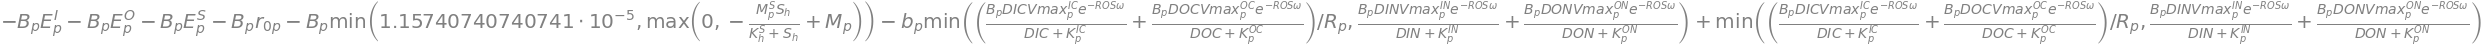

dBh/dt


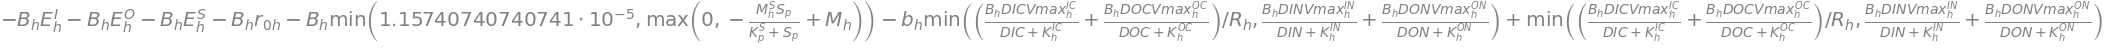

dDON/dt


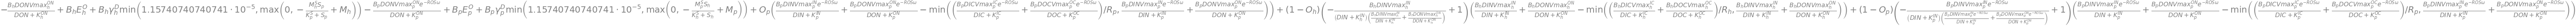

dRDON/dt


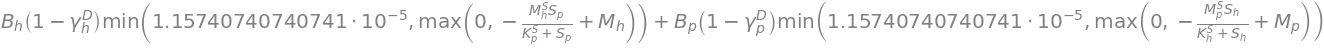

dDIN/dt


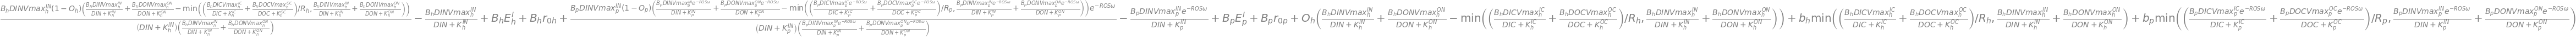

dDOC/dt


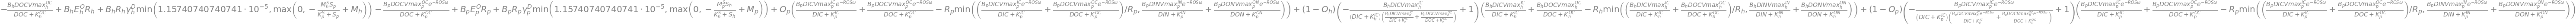

dRDOC/dt


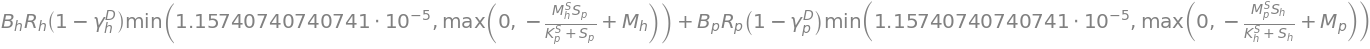

dDIC/dt


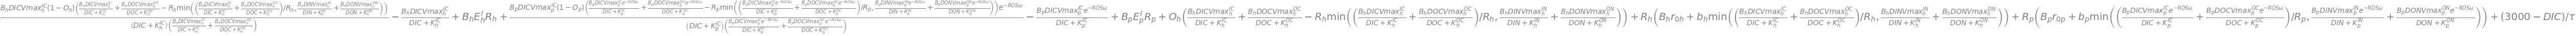

dROS/dt


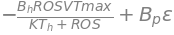

dSp/dt


dSh/dt


In [9]:
print_equations()


In [10]:
var_names, init_vars, calc_dydt, interm_names, intermediate_func = get_main_data()

In [11]:
print_dydt0(calc_dydt, var_names, init_vars)


dBp/dt = 5.97e-06, init Bp = 1.10e+00, newval = 1.10e+00
dBh/dt = 2.22e-05, init Bh = 4.40e+01, newval = 4.40e+01
dDON/dt = -1.16e-04, init DON = 2.00e+01, newval = 2.00e+01
dRDON/dt = 1.04e-05, init RDON = 0.00e+00, newval = 1.04e-05
dDIN/dt = 7.76e-05, init DIN = 1.00e+02, newval = 1.00e+02
dDOC/dt = -1.14e-03, init DOC = 1.32e+02, newval = 1.32e+02
dRDOC/dt = 6.92e-05, init RDOC = 0.00e+00, newval = 6.92e-05
dDIC/dt = 8.85e-04, init DIC = 3.00e+03, newval = 3.00e+03
dROS/dt = 1.16e-06, init ROS = 0.00e+00, newval = 1.16e-06
dSp/dt = 1.16e-16, init Sp = 0.00e+00, newval = 1.16e-16
dSh/dt = 5.79e-16, init Sh = 0.00e+00, newval = 5.79e-16


In [12]:
print_intermediate0(intermediate_func, interm_names, init_vars)


Xp   = 1.00e+09
Xh   = 5.00e+09
limINp = 9.93e-01
limONp = 9.93e-01
limICp = 1.00e+00
limOCp = 9.99e-01
limINh = 9.98e-01
limONh = 9.88e-01
limICh = 1.00e+00
limOCh = 9.91e-01
gross_uptakeINp = 1.09e-05
gross_uptakeONp = 1.53e-09
gross_uptakeICp = 1.02e-04
gross_uptakeOCp = 1.02e-08
gross_uptakeINh = 4.39e-04
gross_uptakeONh = 2.17e-04
gross_uptakeICh = 1.46e-07
gross_uptakeOCh = 1.44e-03
actual_uptakeNp = 1.09e-05
actual_uptakeNh = 2.18e-04
overflowNp = 0.00e+00
overflowCp = 2.96e-05
overflowNh = 4.38e-04
overflowCh = 8.67e-19
deathp = 1.27e-06
deathh = 5.09e-05
exudationOp = 1.27e-06
exudationIp = 0.00e+00
exudationOh = 0.00e+00
exudationIh = 5.09e-05
Treleasep = 1.16e-06
Tbreakdownh = 0.00e+00
respirationp = 2.40e-06
respirationh = 9.38e-05
dic_uptake = -1.04e-16


In [13]:
biomass_diff0(calc_dydt, var_names,init_vars)


dBp/dt + dBh/dt + dDON/dt + dRDON/dt + dDIN/dt = -6.944043864226535e-16


In [14]:
1e10 * Qh

In [15]:
1e9 * Qp

In [16]:
pro_alt_vol_ratio, pro_vol, alt_vol

In [17]:
init_vars

In [18]:
sol = run_solver(calc_dydt, init_vars)

In [19]:
df, mdf = solver2df(sol, var_names, interm_names, intermediate_func)

In [20]:
df.head()

,Bp,Bh,DON,RDON,DIN,DOC,RDOC,DIC,ROS,Sp,...,exudationIh,Treleasep,Tbreakdownh,respirationp,respirationh,dic_uptake,Bp[C],Bh[C],Sp[C],Sh[C]
0,1.100000,44.000000,20.000000,0.000000,100.000000,132.500000,0.000000,3000.000000,0.000000,0.000000e+00,...,0.000051,0.000001,0.000000,0.000002,0.000094,-1.040834e-16,7.287500,291.500000,0.000000e+00,0.000000e+00
1,1.189448,44.318498,18.324178,0.151012,101.116865,116.049465,1.000453,3011.139816,0.002823,1.733546e-12,...,0.000051,0.000001,0.000001,0.000003,0.000095,-2.135131e-04,7.880091,293.610047,1.148474e-11,5.540834e-11
2,1.286182,44.634487,16.642202,0.303392,102.233738,99.549354,2.009970,3019.600436,0.003039,3.608066e-12,...,0.000052,0.000001,0.000001,0.000003,0.000095,-3.756750e-04,8.520954,295.703473,2.390344e-11,1.112149e-10
3,1.390797,44.946123,14.955290,0.457154,103.350636,83.016393,3.028642,3026.020553,0.003266,5.635046e-12,...,0.000052,0.000001,0.000001,0.000003,0.000096,-4.987273e-04,9.214033,297.768065,3.733218e-11,1.674154e-10
4,1.503938,45.250351,13.265148,0.612306,104.468258,66.476487,4.056526,3030.883559,0.003512,7.826909e-12,...,0.000052,0.000002,0.000002,0.000003,0.000096,-5.919349e-04,9.963587,299.783577,5.185327e-11,2.240028e-10


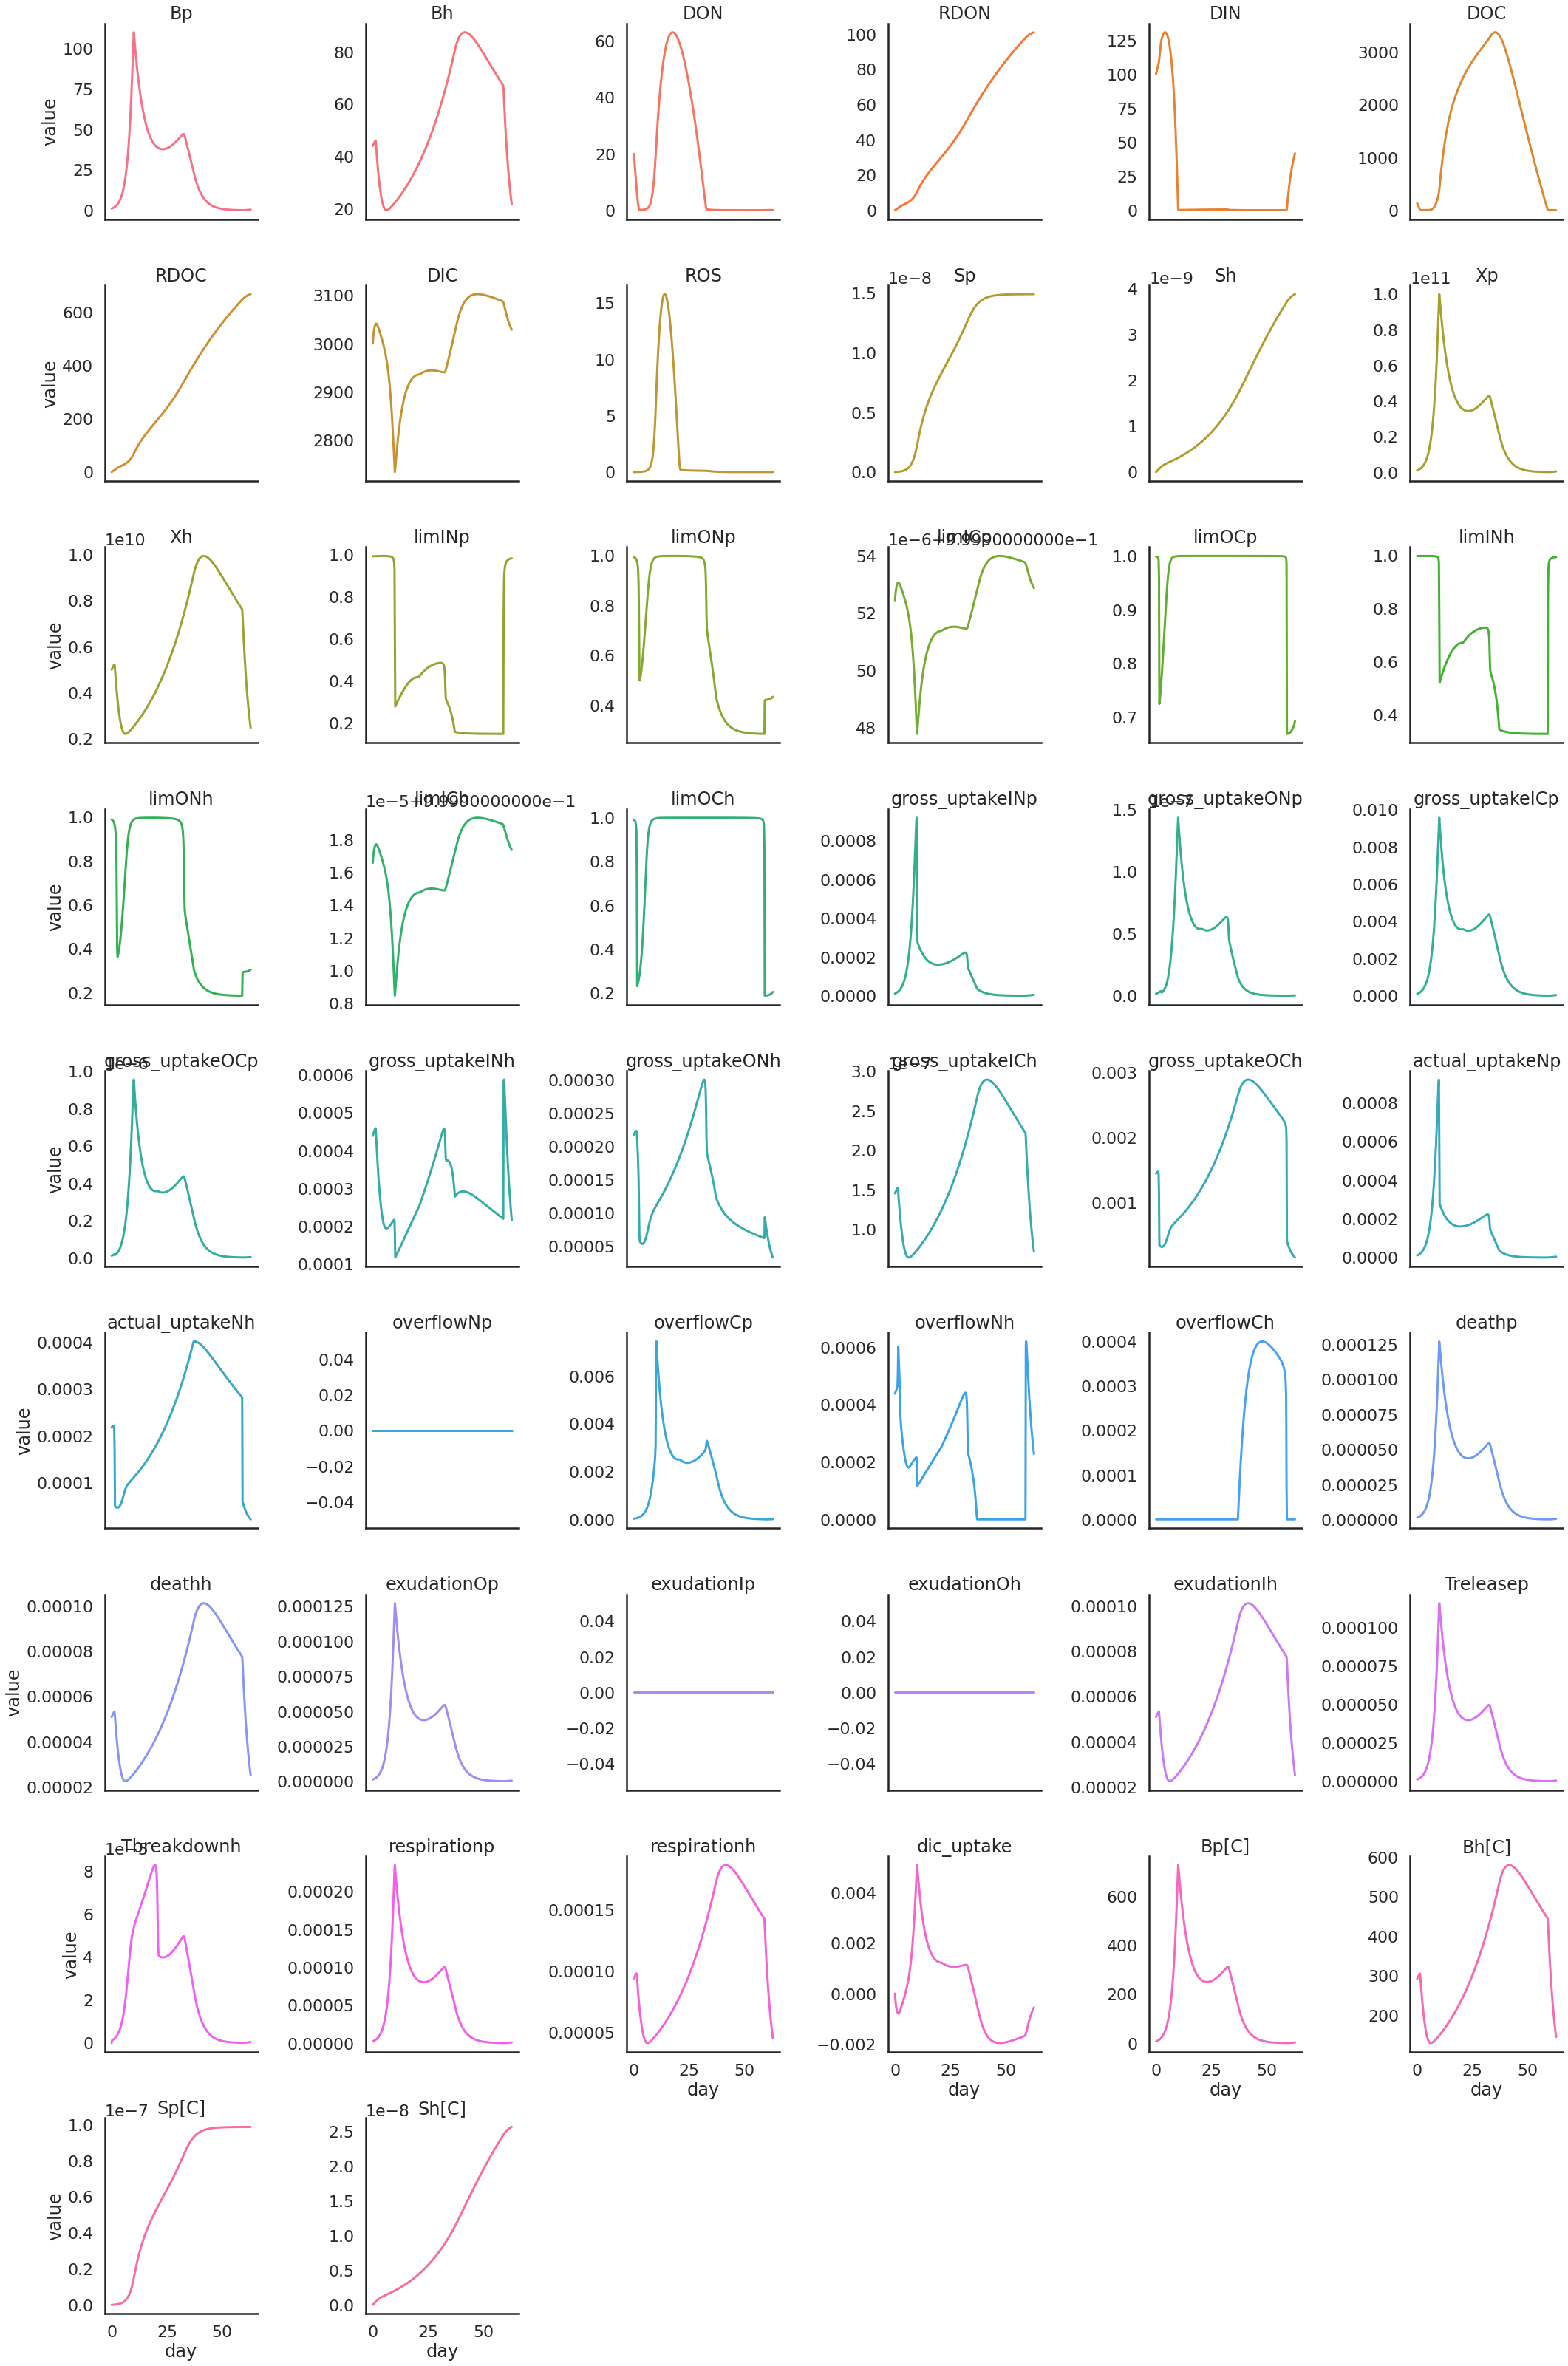

In [21]:
sns.relplot(data=mdf, x='day', y='value', hue='variable',
            kind='line', 
            col='variable', col_wrap=6, facet_kws=dict(sharey=False),
            legend=False,
           ).set_titles(row_template = '{row_name}', col_template = '{col_name}')

In [22]:
refdf.columns

Index(['Unnamed: 0', 'day', '1A3', 'cc 1A3', 'cc mit9312', 'mit9312',
       'cc Bh[N]', 'Bh[N]', 'cc Bp[N]', 'Bp[N]', 'cc Bh[C]', 'Bh[C]',
       'cc Bp[C]', 'Bp[C]', 't'],
      dtype='object')

<AxesSubplot:xlabel='day', ylabel='cells/l'>

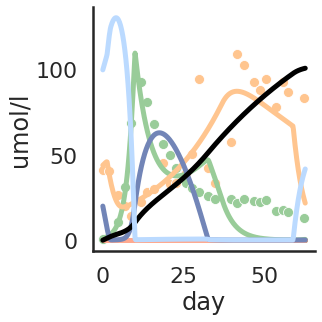

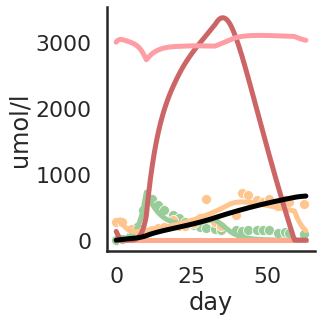

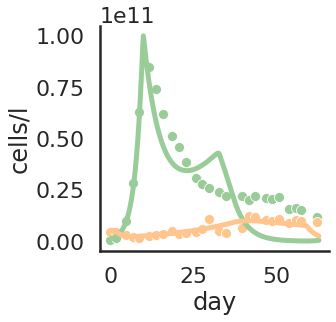

In [39]:
g = sns.relplot(data=mdf.loc[mdf.variable.isin(ccnorder)], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=5, legend=False,
            palette=ccnpalette, hue_order=ccnorder,
           ).set(ylabel='umol/l')
sns.scatterplot(data=refdf, x='day', y='cc Bp[N]', ax=g.ax, s=100, legend=False, color=PCOLOR)
sns.scatterplot(data=refdf, x='day', y='cc Bh[N]', ax=g.ax, s=100, legend=False, color=HCOLOR)

g = sns.relplot(data=mdf.loc[mdf.variable.isin(cccorder)], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=5, legend=False,
            palette=cccpalette, hue_order=cccorder,
           ).set(ylabel='umol/l')
sns.scatterplot(data=refdf, x='day', y='cc Bp[C]', ax=g.ax, s=100, legend=False, color=PCOLOR)
sns.scatterplot(data=refdf, x='day', y='cc Bh[C]', ax=g.ax, s=100, legend=False, color=HCOLOR)

g = sns.relplot(data=mdf.loc[mdf.variable.isin(['Xp', 'Xh'])], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=5, legend=False,
            palette=ccxpalette, hue_order=ccxorder,
           ).set(ylabel='cells/l')
sns.scatterplot(data=refdf, x='day', y='cc mit9312', ax=g.ax, s=100, legend=False, color=PCOLOR)
sns.scatterplot(data=refdf, x='day', y='cc 1A3', ax=g.ax, s=100, legend=False, color=HCOLOR)


In [24]:
df.columns

Index(['Bp', 'Bh', 'DON', 'RDON', 'DIN', 'DOC', 'RDOC', 'DIC', 'ROS', 'Sp',
       'Sh', 't', 'day', 'Xp', 'Xh', 'limINp', 'limONp', 'limICp', 'limOCp',
       'limINh', 'limONh', 'limICh', 'limOCh', 'gross_uptakeINp',
       'gross_uptakeONp', 'gross_uptakeICp', 'gross_uptakeOCp',
       'gross_uptakeINh', 'gross_uptakeONh', 'gross_uptakeICh',
       'gross_uptakeOCh', 'actual_uptakeNp', 'actual_uptakeNh', 'overflowNp',
       'overflowCp', 'overflowNh', 'overflowCh', 'deathp', 'deathh',
       'exudationOp', 'exudationIp', 'exudationOh', 'exudationIh', 'Treleasep',
       'Tbreakdownh', 'respirationp', 'respirationh', 'dic_uptake', 'Bp[C]',
       'Bh[C]', 'Sp[C]', 'Sh[C]'],
      dtype='object')

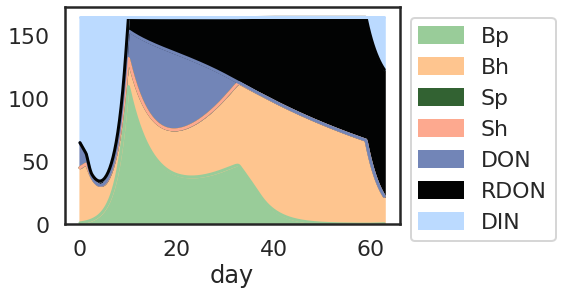

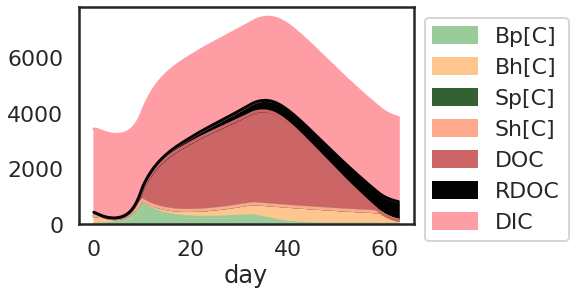

In [25]:
from matplotlib.colors import LinearSegmentedColormap
df[ccnorder+ ['day']].plot.area(x='day', 
                                colormap=LinearSegmentedColormap.from_list("", ccnpalette) 
                               )
plt.legend(bbox_to_anchor =(1,1))
plt.show()
df[cccorder+ ['day']].plot.area(x='day', 
                                colormap=LinearSegmentedColormap.from_list("", cccpalette) 
                               )
plt.legend(bbox_to_anchor =(1,1))
plt.show()


<AxesSubplot:xlabel='day', ylabel='cells/l'>

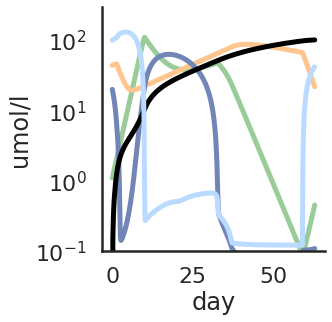

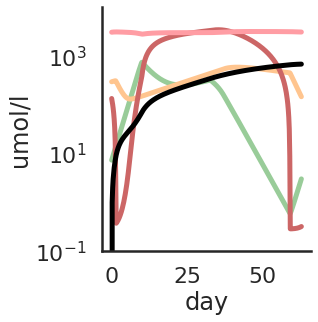

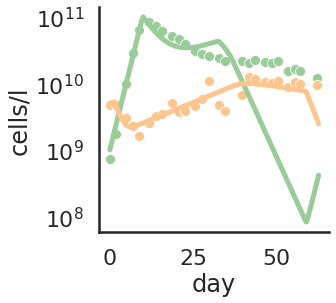

In [38]:
sns.relplot(data=mdf.loc[mdf.variable.isin(ccnorder)], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=5, legend=False,
            palette=ccnpalette, hue_order=ccnorder,
           ).set(ylabel='umol/l', yscale='log', ylim=(1e-1,3e2))

sns.relplot(data=mdf.loc[mdf.variable.isin(cccorder)], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=5, legend=False,
            palette=cccpalette, hue_order=cccorder,
           ).set(ylabel='umol/l', yscale='log', ylim=(1e-1,1e4))

g = sns.relplot(data=mdf.loc[mdf.variable.isin(['Xp', 'Xh'])], 
            x='day', y='value', hue='variable',
            kind='line', 
            lw=5, legend=False,
            palette=ccxpalette, hue_order=ccxorder,
           ).set(ylabel='cells/l', yscale='log')
sns.scatterplot(data=refdf, x='day', y='cc mit9312', ax=g.ax, s=100, legend=False, color=PCOLOR)
sns.scatterplot(data=refdf, x='day', y='cc 1A3', ax=g.ax, s=100, legend=False, color=HCOLOR)

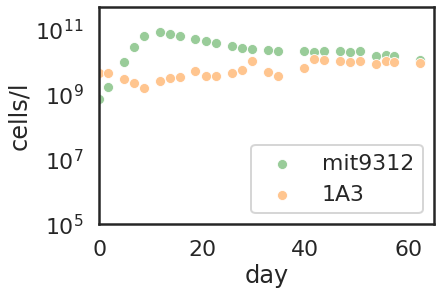

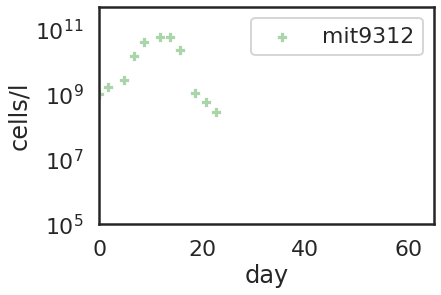

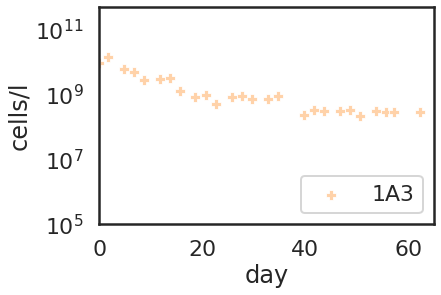

In [27]:
sns.scatterplot(data=refdf, x='day', y='cc mit9312', s=100, legend=False, color=PCOLOR, label='mit9312')
sns.scatterplot(data=refdf, x='day', y='cc 1A3',  s=100, legend=False,color=HCOLOR, label='1A3')
plt.legend(loc='lower right')
plt.ylabel('cells/l')
plt.yscale('log')
plt.ylim((1e5,5e11))
plt.xlim((0,65))

plt.show()
sns.scatterplot(data=refdf, x='day', y='mit9312', s=100, legend=False, color=PCOLOR_light, label='mit9312', marker='P')
plt.legend()
plt.ylabel('cells/l')
plt.yscale('log')
plt.ylim((1e5,5e11))
plt.xlim((0,65))
plt.show()
sns.scatterplot(data=refdf, x='day', y='1A3',  s=100, legend=False,color=HCOLOR_light, label='1A3', marker='P')
plt.legend(loc='lower right')
plt.ylabel('cells/l')
plt.yscale('log')
plt.ylim((1e5,5e11))
plt.xlim((0,65))
plt.show()


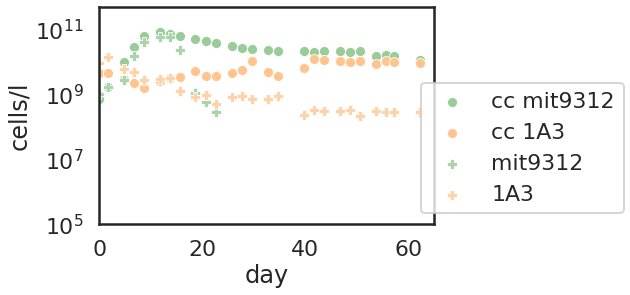

In [28]:
sns.scatterplot(data=refdf, x='day', y='cc mit9312', s=100, legend=False, color=PCOLOR, label='cc mit9312')
sns.scatterplot(data=refdf, x='day', y='cc 1A3',  s=100, legend=False,color=HCOLOR, label='cc 1A3')

sns.scatterplot(data=refdf, x='day', y='mit9312', s=100, legend=False, color=PCOLOR_light, label='mit9312', marker='P')
sns.scatterplot(data=refdf, x='day', y='1A3',  s=100, legend=False,color=HCOLOR_light, label='1A3', marker='P')
plt.legend(loc='lower right', bbox_to_anchor=(1.6,0))
plt.ylabel('cells/l')
plt.yscale('log')
plt.ylim((1e5,5e11))
plt.xlim((0,65))
plt.show()


In [29]:
len(param_vals)

/fast_data/Osnat/tools/anaconda3/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/fast_data/Osnat/tools/anaconda3/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/fast_data/Osnat/tools/anaconda3/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/fast_data/Osnat/tools/anaconda3/lib/python3.9/site-packages/IPyt

In [30]:
df.min()

Bp                 9.045429e-02
Bh                 1.948286e+01
DON                5.712369e-02
RDON               0.000000e+00
DIN                1.224403e-01
DOC                2.876051e-01
RDOC               0.000000e+00
DIC                2.733872e+03
ROS                0.000000e+00
Sp                 0.000000e+00
Sh                 0.000000e+00
t                  0.000000e+00
day                0.000000e+00
Xp                 8.223117e+07
Xh                 2.213961e+09
limINp             1.464256e-01
limONp             2.857978e-01
limICp             9.999478e-01
limOCp             6.682959e-01
limINh             3.285112e-01
limONh             1.858309e-01
limICh             9.999085e-01
limOCh             1.868819e-01
gross_uptakeINp    1.332047e-07
gross_uptakeONp    3.639900e-11
gross_uptakeICp    8.385704e-06
gross_uptakeOCp    5.606581e-10
gross_uptakeINh    1.175949e-04
gross_uptakeONh    3.314472e-05
gross_uptakeICh    6.450436e-08
gross_uptakeOCh    1.471246e-04
actual_u

In [31]:
refdf.nsmallest(10, columns='cc mit9312')

,Unnamed: 0,day,1A3,cc 1A3,cc mit9312,mit9312,cc Bh[N],Bh[N],cc Bp[N],Bp[N],cc Bh[C],Bh[C],cc Bp[C],Bp[C],t
0,0,0.000000,9.297512e+09,4.698967e+09,7.178947e+08,1.032630e+09,41.350913,81.818106,0.789684,1.135893,273.949801,542.044955,5.231658,7.525288,0.000000e+00
1,1,1.820833,1.469212e+10,4.648133e+09,1.753684e+09,1.641075e+09,40.903574,129.290670,1.929053,1.805182,270.986179,856.550691,12.779974,11.959333,1.573200e+05
2,2,4.832639,6.030062e+09,2.996029e+09,9.823158e+09,2.853167e+09,26.365052,53.064547,10.805474,3.138484,174.668467,351.552626,71.586263,20.792454,4.175400e+05
25,26,62.351389,2.848207e+08,9.505116e+09,1.186807e+10,NaN,83.645023,2.506422,13.054882,NaN,554.148279,16.605046,86.488595,NaN,5.387160e+06
24,25,57.351389,2.790659e+08,9.908372e+09,1.519633e+10,NaN,87.193674,2.455780,16.715963,NaN,577.658093,16.269541,110.743252,NaN,4.955160e+06
22,23,53.763889,3.145955e+08,8.856279e+09,1.556821e+10,NaN,77.935256,2.768440,17.125035,NaN,516.321070,18.340917,113.453354,NaN,4.645200e+06
23,24,55.800694,2.812344e+08,1.053628e+10,1.622576e+10,NaN,92.719256,2.474862,17.848338,NaN,614.265070,16.395963,118.245239,NaN,4.821180e+06
17,18,41.790972,3.356130e+08,1.238930e+10,1.996330e+10,NaN,109.025861,2.953394,21.959626,NaN,722.296326,19.566239,145.482523,NaN,3.610740e+06
20,21,48.746528,3.338616e+08,1.001302e+10,2.034765e+10,NaN,88.114605,2.937982,22.382410,NaN,583.759256,19.464128,148.283466,NaN,4.211700e+06
19,20,46.776389,3.010842e+08,1.052512e+10,2.113608e+10,NaN,92.621023,2.649541,23.249688,NaN,613.614279,17.553211,154.029185,NaN,4.041480e+06


In [32]:
refdf.head()

,Unnamed: 0,day,1A3,cc 1A3,cc mit9312,mit9312,cc Bh[N],Bh[N],cc Bp[N],Bp[N],cc Bh[C],Bh[C],cc Bp[C],Bp[C],t
0,0,0.000000,9.297512e+09,4.698967e+09,7.178947e+08,1.032630e+09,41.350913,81.818106,0.789684,1.135893,273.949801,542.044955,5.231658,7.525288,0.000000
1,1,1.820833,1.469212e+10,4.648133e+09,1.753684e+09,1.641075e+09,40.903574,129.290670,1.929053,1.805182,270.986179,856.550691,12.779974,11.959333,157319.999971
2,2,4.832639,6.030062e+09,2.996029e+09,9.823158e+09,2.853167e+09,26.365052,53.064547,10.805474,3.138484,174.668467,351.552626,71.586263,20.792454,417540.000010
3,3,6.853472,4.987215e+09,2.290707e+09,2.812842e+10,1.576008e+10,20.158221,43.887491,30.941263,17.336084,133.548213,290.754630,204.985868,114.851560,592139.999981
4,4,8.779167,2.867312e+09,1.598094e+09,6.262316e+10,4.113340e+10,14.063225,25.232343,68.885474,45.246737,93.168864,167.164271,456.366263,299.759633,758520.000029


In [33]:
dir(sol)

['message',
 'nfev',
 'njev',
 'nlu',
 'sol',
 'status',
 'success',
 't',
 't_events',
 'y',
 'y_events']

In [34]:
sol.success

True

In [35]:
sol.status

/fast_data/Osnat/tools/anaconda3/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/fast_data/Osnat/tools/anaconda3/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/fast_data/Osnat/tools/anaconda3/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/fast_data/Osnat/tools/anaconda3/lib/python3.9/site-packages/IPyt

In [36]:
sol.nfev, sol.njev, sol.nlu

In [37]:
sol.message

'The solver successfully reached the end of the integration interval.'